In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
exercise = sns.load_dataset("exercise", index_col=0)
exercise.set_index("id", inplace=True)

In [3]:
exercise.head()

,diet,pulse,time,kind
id,,,,
1,low fat,85,1 min,rest
1,low fat,85,15 min,rest
1,low fat,88,30 min,rest
2,low fat,90,1 min,rest
2,low fat,92,15 min,rest


In [4]:
exercise.diet

id
1     low fat
1     low fat
1     low fat
2     low fat
2     low fat
       ...   
29     no fat
29     no fat
30     no fat
30     no fat
30     no fat
Name: diet, Length: 90, dtype: category
Categories (2, object): ['no fat', 'low fat']

In [5]:
exercise.mode()

,diet,pulse,time,kind
0,no fat,92,1 min,rest
1,low fat,97,15 min,walking
2,NaN,100,30 min,running


In [29]:
oiii = exercise['pulse'].mean()
exercise['pulse'].median()
exercise['pulse'].mode()

0     92
1     97
2    100
Name: pulse, dtype: int64

In [7]:
exercise.describe()

,pulse
count,90.000000
mean,99.700000
std,14.858471
min,80.000000
25%,90.250000
50%,96.000000
75%,103.000000
max,150.000000


In [8]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 1 to 30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   diet    90 non-null     category
 1   pulse   90 non-null     int64   
 2   time    90 non-null     category
 3   kind    90 non-null     category
dtypes: category(3), int64(1)
memory usage: 2.0 KB


In [9]:
exercise.head()

,diet,pulse,time,kind
id,,,,
1,low fat,85,1 min,rest
1,low fat,85,15 min,rest
1,low fat,88,30 min,rest
2,low fat,90,1 min,rest
2,low fat,92,15 min,rest


In [10]:
dicionario = pd.DataFrame([
    {
        "variavel": "id",
        "descricao": "Indivíduo",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "diet",
        "descricao": "Tipo de dieta",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "pulse",
        "descricao": "Batimentos cardíacos",
        "tipo":"quantitativa",
        "subtipo":"discreta",
    },{
        "variavel": "time",
        "descricao": "Tempo de exercício",
        "tipo":"quantitativa",
        "subtipo":"contínua",
    },{
        "variavel": "kind",
        "descricao": "Tipo de exercício",
        "tipo":"qualitativa",
        "subtipo":"nominal",
    }
])

dicionario

,variavel,descricao,tipo,subtipo
0,id,Indivíduo,qualitativa,nominal
1,diet,Tipo de dieta,qualitativa,nominal
2,pulse,Batimentos cardíacos,quantitativa,discreta
3,time,Tempo de exercício,quantitativa,contínua
4,kind,Tipo de exercício,qualitativa,nominal


In [11]:
qualitativas = dicionario[dicionario['tipo'] == 'qualitativa'].variavel.tolist()
quantitativas = dicionario[dicionario['tipo'] == 'quantitativa'].variavel.tolist()

In [12]:
exercise.describe(include="all")

,diet,pulse,time,kind
count,90,90.000000,90,90
unique,2,NaN,3,3
top,no fat,NaN,1 min,rest
freq,45,NaN,30,30
mean,NaN,99.700000,NaN,NaN
std,NaN,14.858471,NaN,NaN
min,NaN,80.000000,NaN,NaN
25%,NaN,90.250000,NaN,NaN
50%,NaN,96.000000,NaN,NaN
75%,NaN,103.000000,NaN,NaN


In [13]:
exercise.groupby('id')['pulse'].agg(['mean','median','std'])

,mean,median,std
id,,,
1,86.000000,85.0,1.732051
2,91.666667,92.0,1.527525
3,96.000000,97.0,1.732051
4,81.666667,82.0,1.527525
5,91.333333,91.0,0.577350
6,83.333333,83.0,0.577350
7,88.333333,88.0,1.527525
8,93.666667,94.0,1.527525
9,97.333333,97.0,1.527525


In [19]:
dadus = exercise.groupby('kind')['pulse'].agg(['mean','median','std'])
dadus

/tmp/ipykernel_2833/3443687008.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dadus = exercise.groupby('kind')['pulse'].agg(['mean','median','std'])


,mean,median,std
kind,,,
rest,90.833333,91.5,5.831445
walking,95.200000,95.5,6.779279
running,113.066667,110.0,17.620390


<Axes: xlabel='kind', ylabel='mean'>

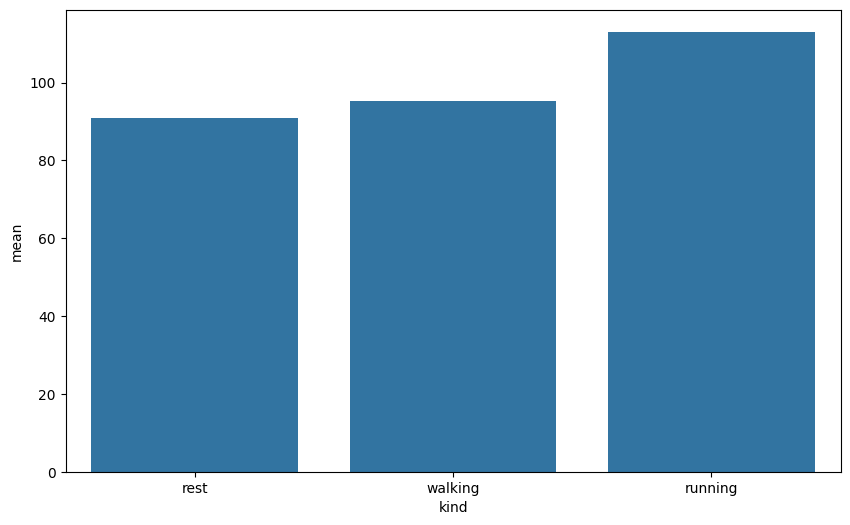

In [20]:
plt.figure(figsize=(10,6))

sns.barplot(dadus, x='kind', y='mean')

<Axes: xlabel='pulse', ylabel='Count'>

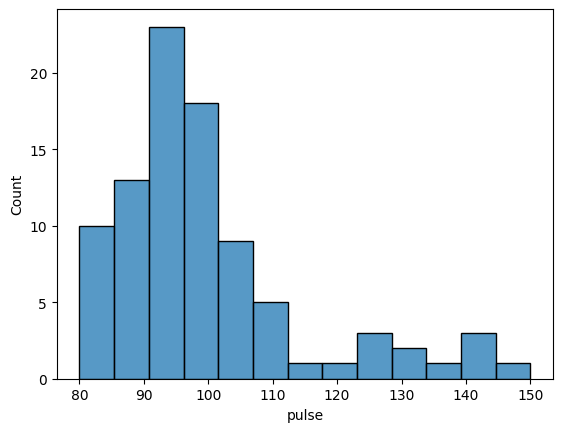

In [32]:
sns.histplot(exercise, x='pulse')